In [11]:
# Imports
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import pickle 

In [8]:
path = 'us_etf_stocks_dataset\\'
# path = 'E:\\Dataset\\'

train_stocks = ['aapl', 'msft', 'amzn', 'nvda', 'googl']
test_stocks = ['ge', 'ibm', 'mo', 'hpq', 'ko']
spy_companies = ['aapl', 'msft', 'amzn', 'nvda', 'googl', 'brk-b', 'goog', 'fb', 'xom', 'unh', 'tsla', 'jnj', 'jpm', 'v', 
                'pg', 'ma', 'lly', 'hd', 'cvx', 'mrk', 'abbv', 'pep', 'avgo', 'ko', 'cost', 'pfe', 'crm', 'mcd', 'wmt', 
                'tmo', 'csco', 'bac', 'amd', 'acn','adbe', 'abt', 'cmcsa', 'dis', 'orcl', 'nflx', 'wfc', 'txn', 'dhr',
                'vz', 'nee', 'pm', 'bmy', 'nke'
                ]

def read_stock_data(names):
    data = {}
    for stock in names:
        data[stock] = pd.read_csv(path + f'Stocks\\{stock}.us.txt')
    return data

train_stock_data = read_stock_data(train_stocks)
test_stock_data = read_stock_data(train_stocks)

In [3]:
def preprocess_data(name, timestep = 50, date = None):
    scaler = MinMaxScaler()

    data = pd.read_csv(path + f'Stocks\\{name}.us.txt')

    if date:
        start_date = data['Date'] >= date
        data = data[start_date]

    data = data['Open']
    data = np.array(data)
    data = data.reshape(-1, 1)
    scaled_data = scaler.fit_transform(data)

    X_train = []
    y_train = []
    for i in range(timestep, len(data)):
        X_train.append(scaled_data[i - timestep:i, 0])
        y_train.append(scaled_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    print(X_train.shape)
    
    return X_train, y_train

In [4]:
def train_data(names, timestep = 50, date = None, epochs = 50, batch_size = 32):
    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(timestep, 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    for name in names:
        X_train, y_train = preprocess_data(name, timestep = timestep, date = date)
        model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    
    return model

In [5]:
def predict_data(model, names, timestep = 50, date = None):
    for name in names:
        scaler = MinMaxScaler()

        data = pd.read_csv(path + f'Stocks\\{name}.us.txt')

        if date:
            start_date = data['Date'] >= date
            data = data[start_date]


        data = data['Open']
        data = np.array(data)
        data = data.reshape(-1, 1)
        scaled_data = scaler.fit_transform(data)

        X_test = []
        for i in range(timestep, len(scaled_data)):
            X_test.append(scaled_data[i - timestep:i, 0])
        
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        prediction = model.predict(X_test)
        prediction = scaler.inverse_transform(prediction)

        print(f'MSE: {mean_squared_error(data[timestep:], prediction)}')
        print(f'R2: {r2_score(data[timestep:], prediction)}')

        name = name.upper()
        plt.plot(data[timestep:], color = 'black', label = f'Actual {name} Stock Price')
        plt.plot(prediction, color = 'green', label = f'Predicted {name} Stock Price')
        plt.title(f'{name} Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

In [6]:
model = train_data(['aapl'], date = '2000-00-00', epochs = 25, batch_size = 32)

(4443, 50, 1)
Epoch 1/25
139/139 [==============================] - 12s 50ms/step - loss: 0.0046
Epoch 2/25
139/139 [==============================] - 7s 49ms/step - loss: 0.0016
Epoch 3/25
139/139 [==============================] - 8s 56ms/step - loss: 0.0015
Epoch 4/25
139/139 [==============================] - 7s 50ms/step - loss: 0.0013
Epoch 5/25
139/139 [==============================] - 7s 50ms/step - loss: 0.0014
Epoch 6/25
139/139 [==============================] - 7s 49ms/step - loss: 0.0012
Epoch 7/25
139/139 [==============================] - 8s 55ms/step - loss: 0.0012
Epoch 8/25
139/139 [==============================] - 8s 55ms/step - loss: 0.0010
Epoch 9/25
139/139 [==============================] - 8s 59ms/step - loss: 9.3085e-04
Epoch 10/25
139/139 [==============================] - 8s 55ms/step - loss: 0.0010
Epoch 11/25
139/139 [==============================] - 8s 54ms/step - loss: 9.8078e-04
Epoch 12/25
139/139 [==============================] - 8s 55ms/step - los

In [13]:
#!pip install pyyaml h5py

In [14]:
model.save('generalized_model.h5')

139/139 [==============================] - 3s 19ms/step
MSE: 7.74107263265632
R2: 0.9960162777867062


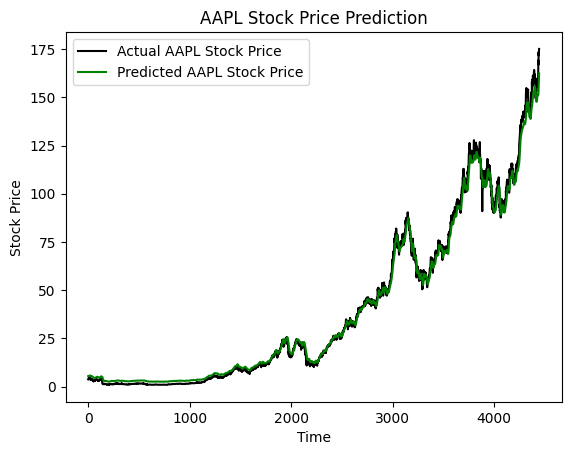

139/139 [==============================] - 3s 19ms/step
MSE: 1.5899131844891887
R2: 0.9910558585757208


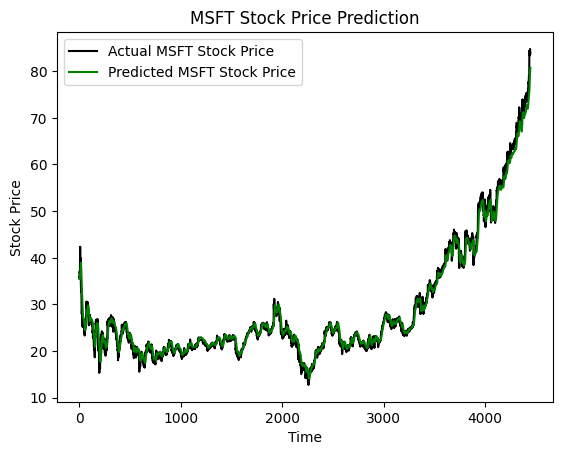

139/139 [==============================] - 3s 19ms/step
MSE: 278.82246705396096
R2: 0.9955359208910376


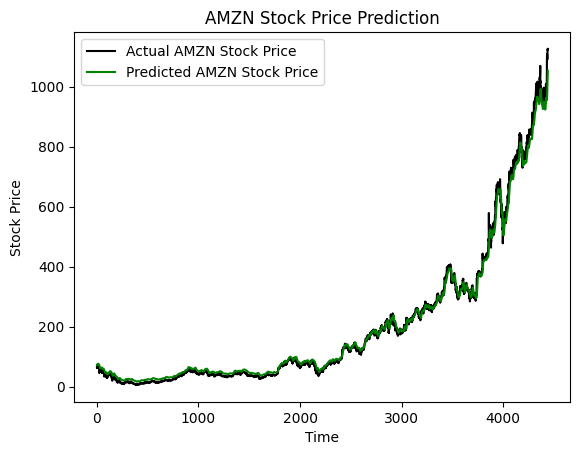

139/139 [==============================] - 3s 19ms/step
MSE: 8.866190553526458
R2: 0.9906611116572489


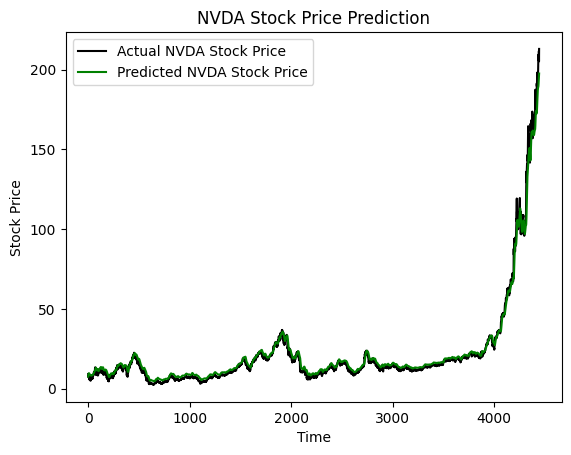

103/103 [==============================] - 2s 19ms/step
MSE: 364.51463061001436
R2: 0.9933047999116162


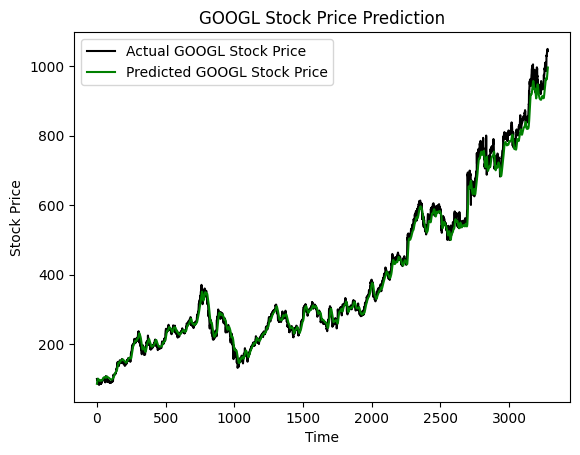

139/139 [==============================] - 3s 19ms/step
MSE: 8.139038282567894
R2: 0.9942705129667974


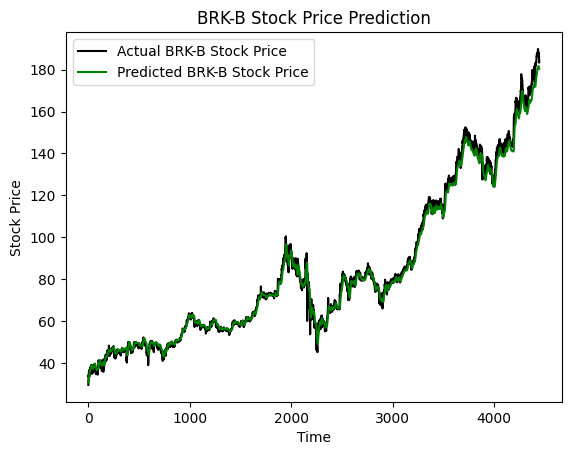

28/28 [==============================] - 1s 18ms/step
MSE: 503.3251227359893
R2: 0.9752540246537458


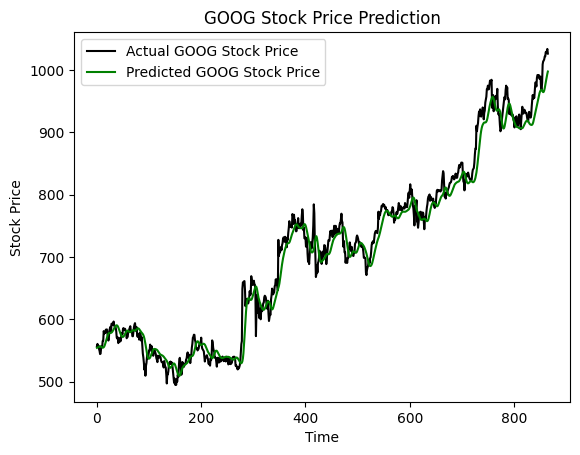

42/42 [==============================] - 1s 18ms/step
MSE: 16.795023680013216
R2: 0.9911324703229113


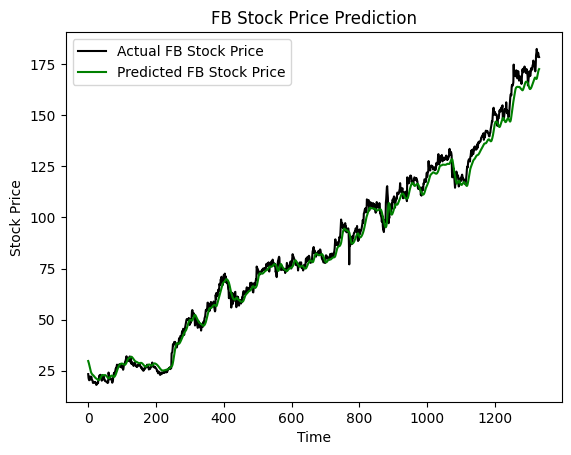

139/139 [==============================] - 3s 19ms/step
MSE: 3.560308716461979
R2: 0.9901962206306198


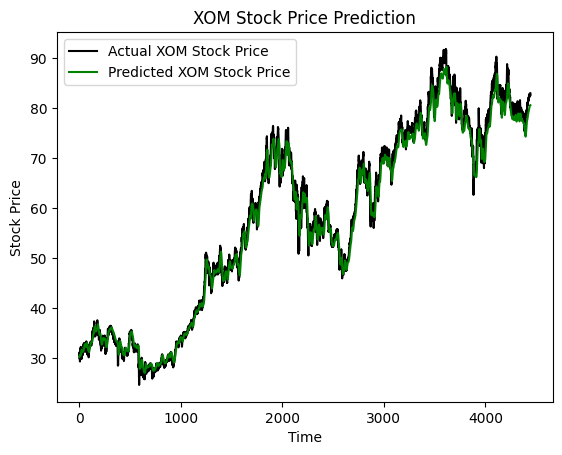

139/139 [==============================] - 3s 19ms/step
MSE: 7.88937324170001
R2: 0.9957969020477424


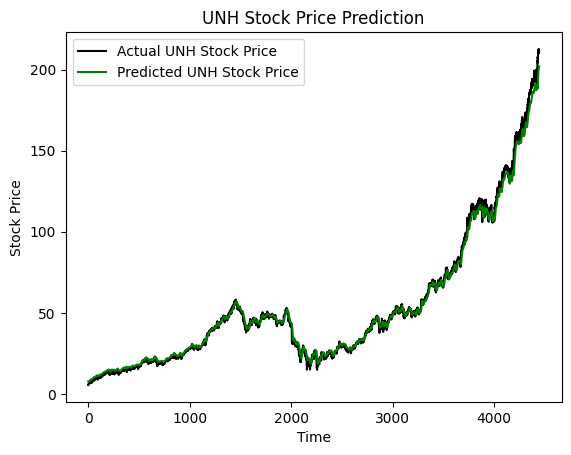

57/57 [==============================] - 1s 19ms/step
MSE: 137.525661096493
R2: 0.9878198949635896


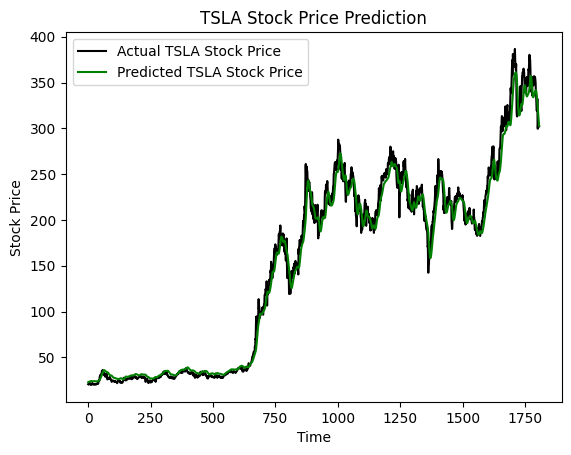

139/139 [==============================] - 3s 19ms/step
MSE: 3.4061839058635894
R2: 0.9945301247281388


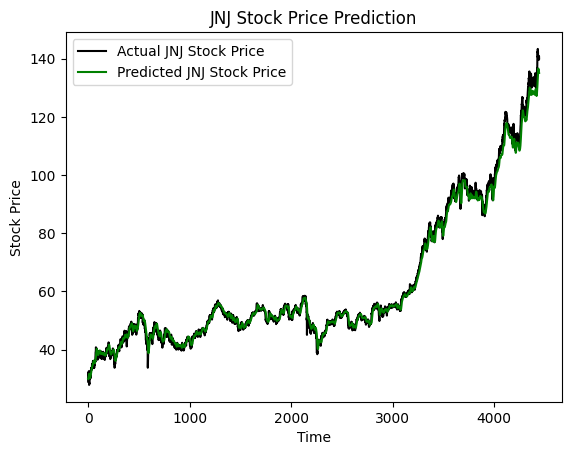

139/139 [==============================] - 3s 19ms/step
MSE: 3.401642450415546
R2: 0.9866419724426186


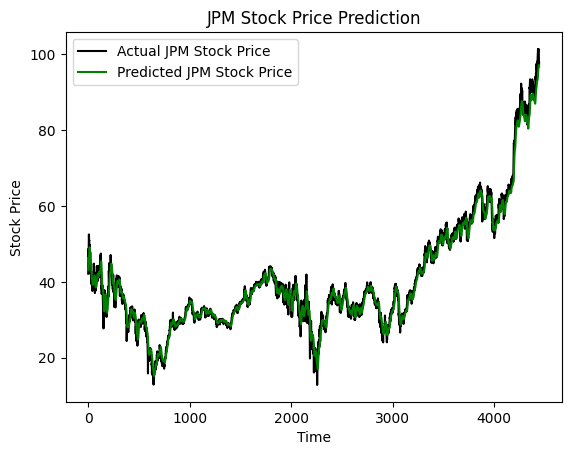

75/75 [==============================] - 1s 19ms/step
MSE: 3.5672955552609364
R2: 0.9951809230346873


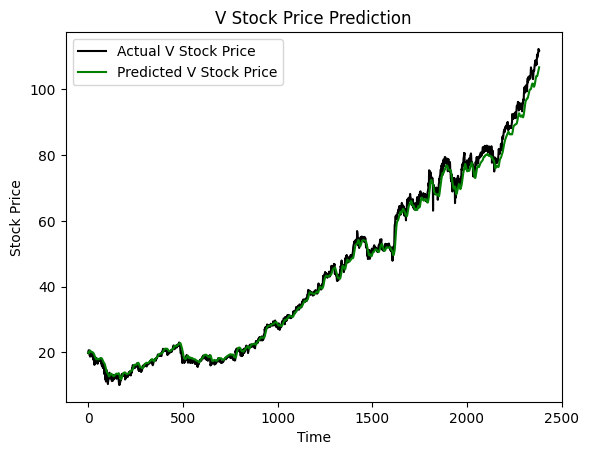

139/139 [==============================] - 3s 19ms/step
MSE: 2.2572855666093616
R2: 0.9921962948143305


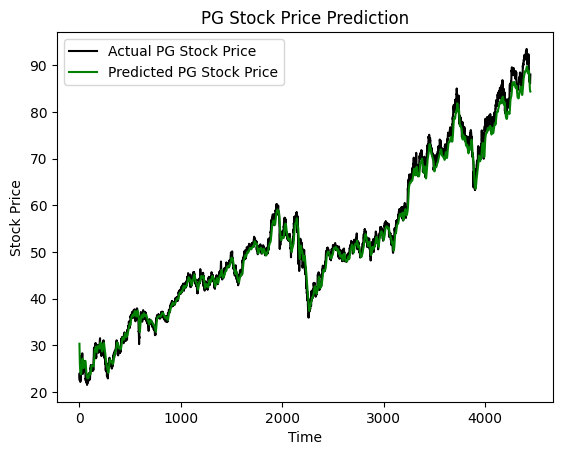

89/89 [==============================] - 2s 19ms/step
MSE: 5.952317023243969
R2: 0.9954467174525855


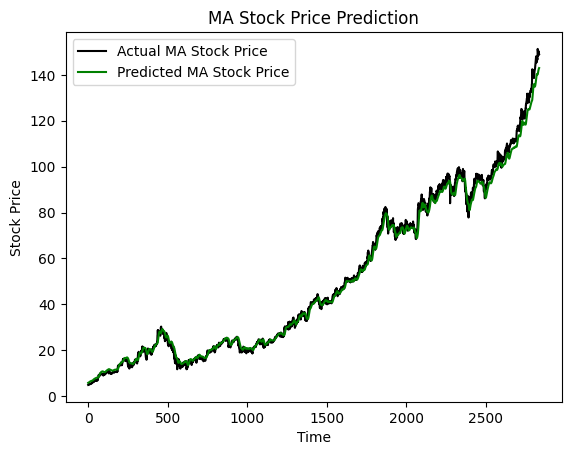

139/139 [==============================] - 3s 19ms/step
MSE: 3.997297265170394
R2: 0.9846687411130438


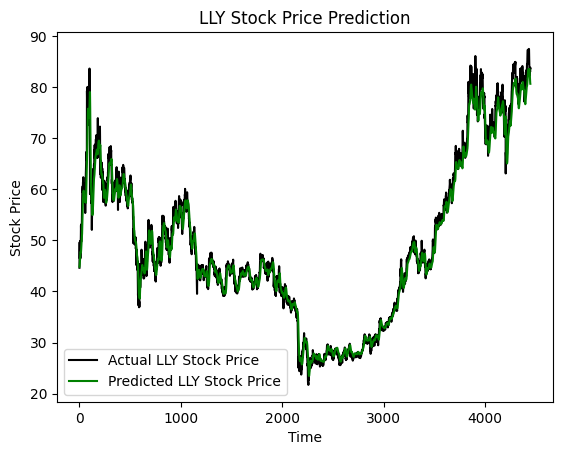

139/139 [==============================] - 3s 19ms/step
MSE: 6.530607124677079
R2: 0.9953025731892251


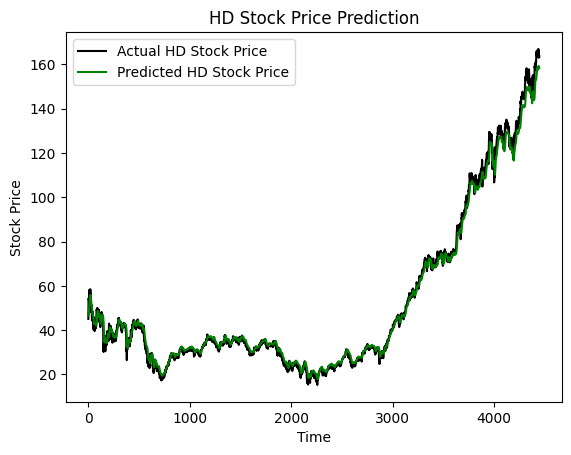

139/139 [==============================] - 3s 19ms/step
MSE: 6.103671267139714
R2: 0.9918832411630933


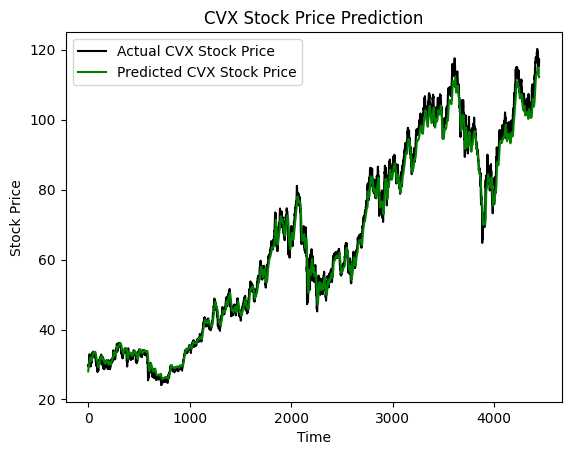

139/139 [==============================] - 3s 21ms/step
MSE: 2.3623107184594185
R2: 0.9856740333208678


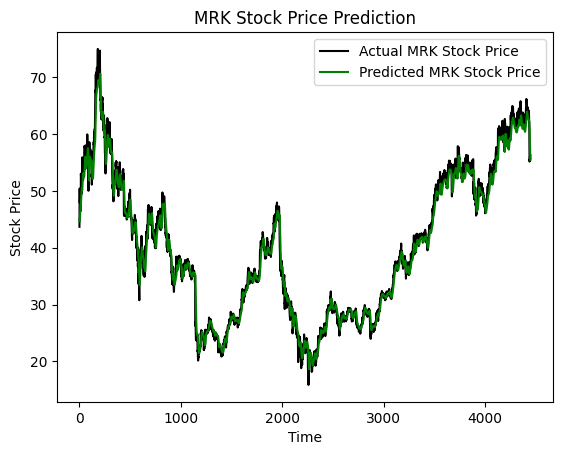

37/37 [==============================] - 1s 21ms/step
MSE: 4.531701521068146
R2: 0.9666550017738601


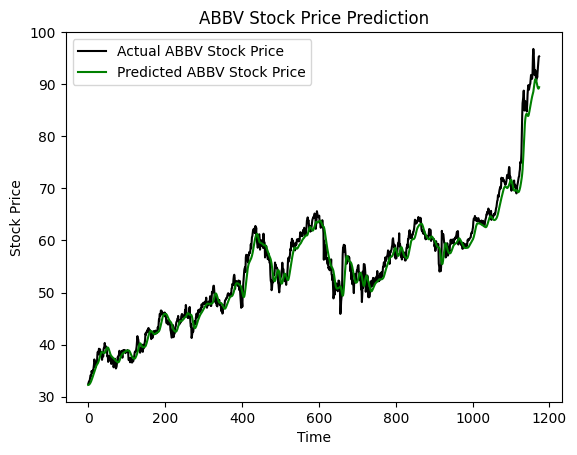

139/139 [==============================] - 3s 20ms/step
MSE: 2.9884746217697695
R2: 0.993917388383752


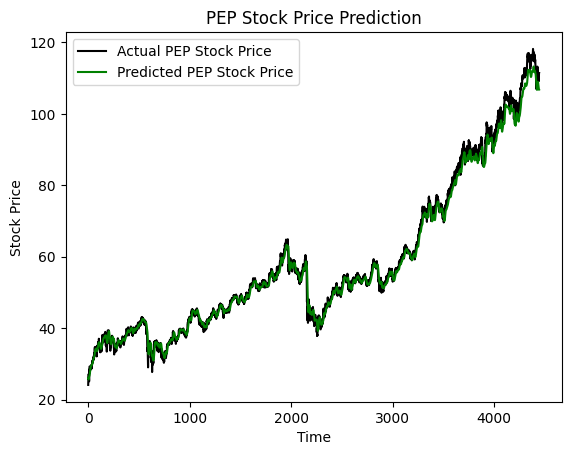

64/64 [==============================] - 1s 19ms/step
MSE: 28.009702970586382
R2: 0.9942335147491567


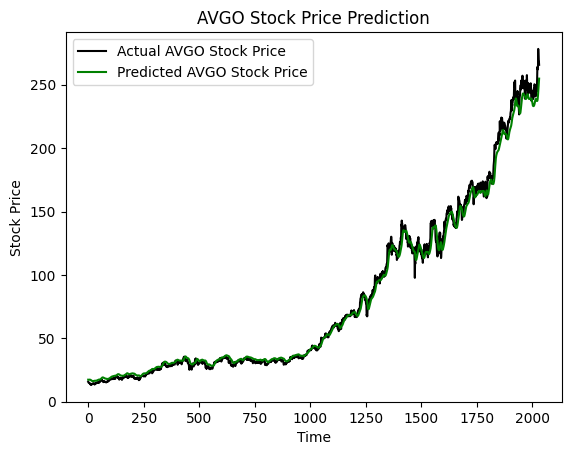

139/139 [==============================] - 3s 19ms/step
MSE: 0.5647332820717498
R2: 0.9925892553851171


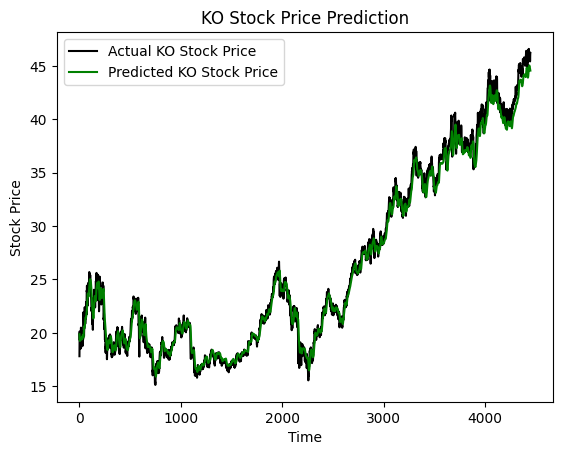

139/139 [==============================] - 3s 19ms/step
MSE: 8.134861855185326
R2: 0.9955357476562198


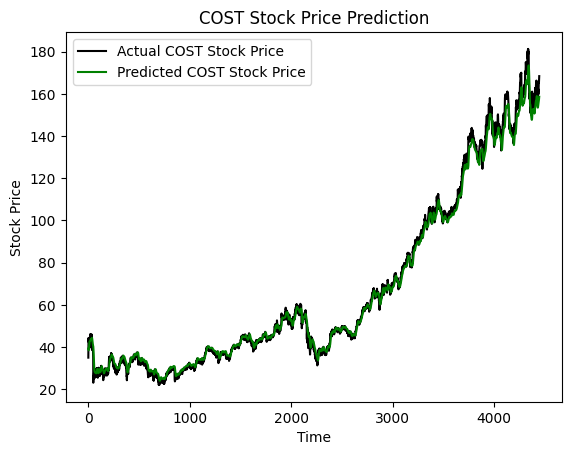

In [9]:
predict_data(model, spy_companies, date = '2000-00-00')